In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
import cv2

In [ ]:
img = cv2.imread('/drive/My Drive/ML Data/UTKFaceData/tmp/UTKFace/20_1_3_20170104231832057.jpg.chip.jpg',0)

In [ ]:
import numpy as np

In [ ]:
print(img)

[[  9   9   9 ...  19  18  17]
 [  9   9   9 ...  18  17  16]
 [  9   9   9 ...  16  15  14]
 ...
 [  4   4   4 ... 138 128 121]
 [  4   4   4 ... 144 137 131]
 [  4   4   4 ... 148 143 139]]


In [ ]:
print(img.shape)

(200, 200)


In [ ]:
img_final = cv2.resize(img, (100,100), cv2.INTER_AREA)

In [ ]:
import matplotlib.pyplot as plt

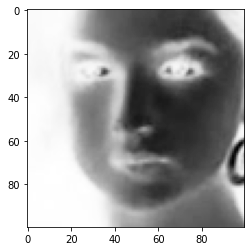

In [ ]:
plt.imshow(img_final, cmap = 'Greys')
plt.show()

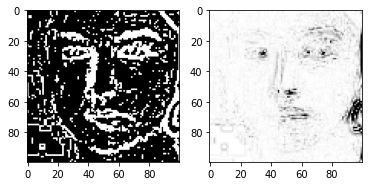

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img_final)
grey_temp = cv2.equalizeHist(img_final)

grey_1 = cv2.adaptiveThreshold(grey_temp,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,5,2)
plt.subplot(1,2,1)
plt.imshow(grey_1 ,cmap = 'Greys')
grey_1 = grey_1.ravel()

ddepth = cv2.CV_16S
dst1 = cv2.Laplacian(grey_temp, ddepth, ksize=3)
grey_2 = cv2.convertScaleAbs(dst1)
plt.subplot(1,2,2)
plt.imshow(grey_2, cmap = 'Greys')
grey_2 = grey_2.ravel()

In [ ]:
grey_3 = np.concatenate((grey_1, grey_2), axis=None)

In [ ]:
grey_3 = grey_3.reshape(1,20000)

In [ ]:
import joblib

In [ ]:
model = joblib.load('/drive/My Drive/ML Data/Grey_Age_UTK_Sobel_PCA/SigmoidModel.sav')

In [ ]:
y = model.predict(grey_3)

In [ ]:
print(y)

[22.9]
